## Galactic Extinction

Trace the galactic extinction towards a field using , e.g., the GAIA A_g

In [5]:
using PyCall
using Distributions
using Statistics

using Distances
using Random , Formatting
#using AstroLib
using TSne

rootdir = "/home/stephane/Science/cluster/GAIA"

push!(LOAD_PATH,"$rootdir/master/src")
using GaiaClustering

import PyPlot

@pyimport astroquery.vizier as vizier
@pyimport astropy.units as u
@pyimport astropy.coordinates as coord
@pyimport matplotlib.tri as tri

mutable struct A_G 
    distance::Array{Float64}
    lgal::Array{Float64}
    bgal::Array{Float64}
    ag::Array{Float64}
end

## directory
wdir    = "$rootdir/products"
plotdir = "$rootdir/products/test"

cd(wdir)

In [6]:
## Get the galactic extinction from the GAIA data
function _get_AG(voname)::A_G
    data       = read_votable(voname)
    ngaia = length(data)
    
    lgal     = zeros(ngaia)
    bgal     = zeros(ngaia) 
    ag       = zeros(ngaia)
    distance = zeros(ngaia)
    
    for i in 1:ngaia
        distance[i] = 1000 ./ convert(Float64,data[i]["parallax"])
        lgal[i]     = convert(Float64,data[i]["l"])
        bgal[i]     = convert(Float64,data[i]["b"])
        ag[i]       = convert(Float64,data[i]["a_g_val"])
    end
    
    i1 =  ag .>= 0.

    println("## summary AG")
    println(length(ag))
    println(length(i1))
    
    nag = length(ag[i1])
    res = A_G(distance[i1],lgal[i1], bgal[i1], ag[i1])
    
    return(res)
end

_get_AG (generic function with 1 method)

In [7]:
## plot of the A_V

function plot_AG(ag::A_G)
    PyPlot.plt[:figure](figsize=(8.0,8.0))
    PyPlot.plt[:subplot](1,1,1)
    
    PyPlot.plt[:plot](ag.distance,ag.ag, "b." , markersize = 0.5) 
    PyPlot.plt[:xlim]([0., 2000.])
    PyPlot.show()
    
end

plot_AG (generic function with 1 method)

## Extracting the extinction A_G (mag)...
## Votable test.vot read


┌ Warning: `getindex(o::PyObject, i::Integer)` is deprecated, use `get(o, i - 1)` instead.
│   caller = _get_AG(::String) at In[6]:12
└ @ Main ./In[6]:12
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = _get_AG(::String) at In[6]:12
└ @ Main ./In[6]:12
┌ Warning: `getindex(o::PyObject, i::Integer)` is deprecated, use `get(o, i - 1)` instead.
│   caller = _get_AG(::String) at In[6]:13
└ @ Main ./In[6]:13
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = _get_AG(::String) at In[6]:13
└ @ Main ./In[6]:13
┌ Warning: `getindex(o::PyObject, i::Integer)` is deprecated, use `get(o, i - 1)` instead.
│   caller = _get_AG(::String) at In[6]:14
└ @ Main ./In[6]:14
┌ Warning: `getindex(o::PyObject, s::Abstrac

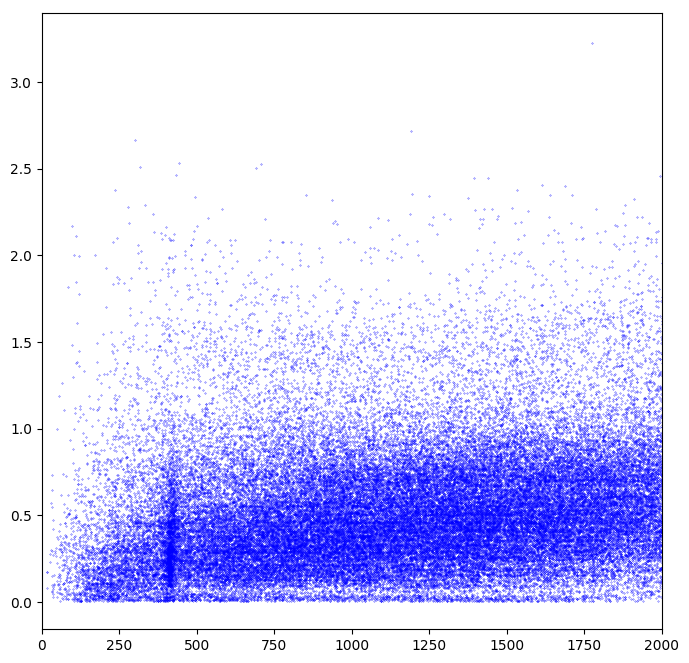

## summary AG
197815
197815


┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = plot_AG(::A_G) at In[7]:4
└ @ Main ./In[7]:4
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = plot_AG(::A_G) at In[7]:5
└ @ Main ./In[7]:5
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = plot_AG(::A_G) at In[7]:7
└ @ Main ./In[7]:7
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = plot_AG(::A_G) at In[7]:8
└ @ Main ./In[7]:8


In [8]:
macro main(voname)
    Random.seed!(1237)
    println("## Extracting the extinction A_G (mag)...")
    
    ag = _get_AG(voname)
    plot_AG(ag)
    
end


@main("test.vot")